# LAB 5 - EXERCISE- Saniya Kolangde
## INFO 411
___
# Logistic Regression Project 

An advertising dataset is given to your that contains many features and the target feature of 'Clicked on ad' column. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [194]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [195]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [157]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [158]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

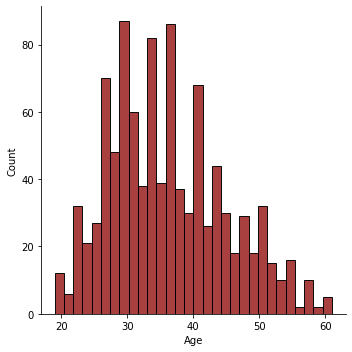

In [159]:
sns.displot(ad_data['Age'],kde=False,color='darkred',bins=30)

**Create a jointplot showing Area Income versus Age.**

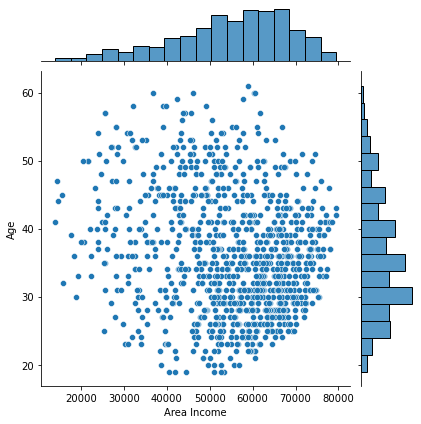

In [160]:
sns.jointplot(x = ad_data['Area Income'], y = ad_data['Age'])

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

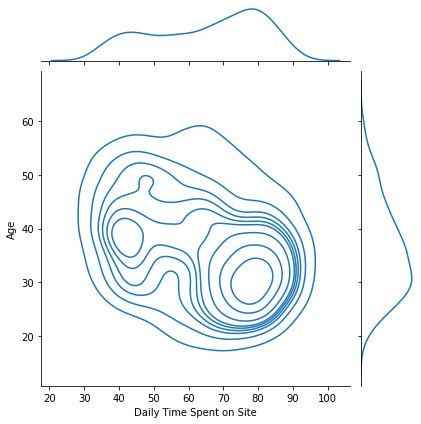

In [161]:
sns.jointplot(x = ad_data['Daily Time Spent on Site'], y = ad_data['Age'], kind='kde')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

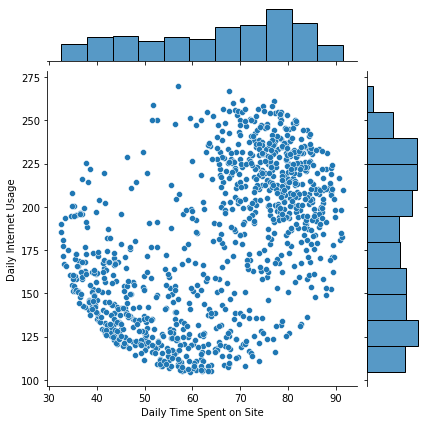

In [162]:
sns.jointplot(x = ad_data['Daily Time Spent on Site'], y = ad_data['Daily Internet Usage'])

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

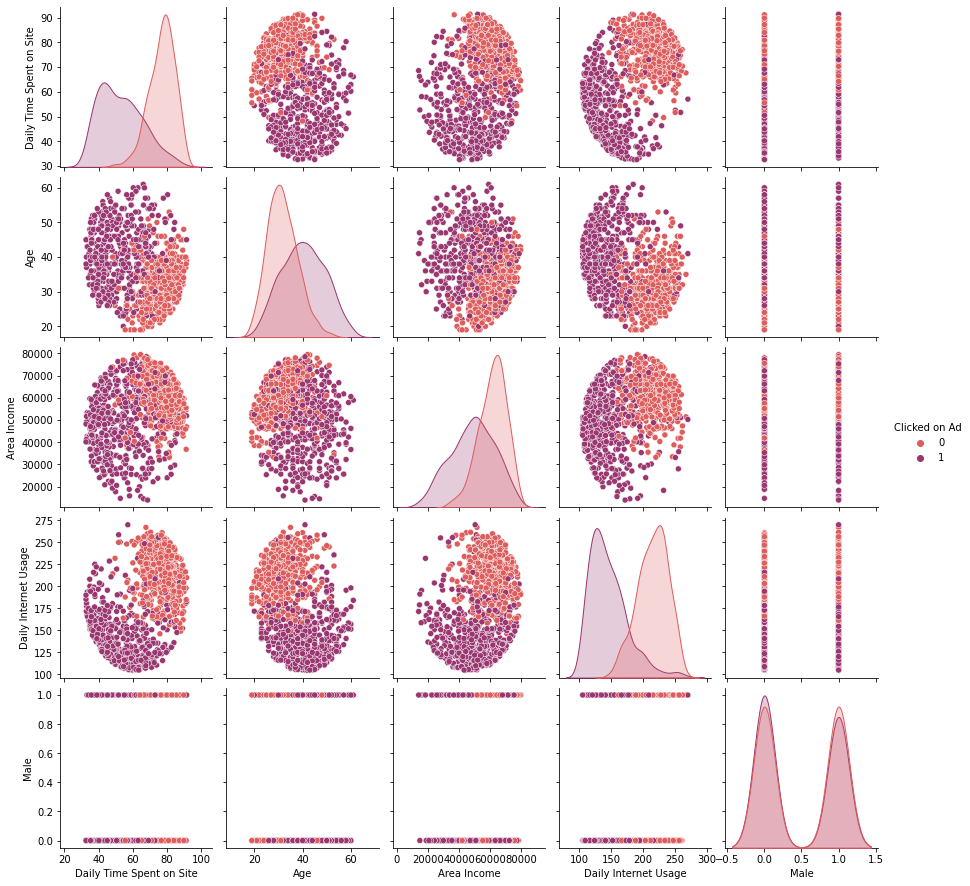

In [163]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='flare')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [165]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [166]:
X = ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
Y = ad_data[['Clicked on Ad']]

** Train and fit a logistic regression model on the training set.**

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [168]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [169]:
predictions = logreg.predict(X_test)

In [170]:
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

In [171]:
Y_test

,Clicked on Ad
545,1
298,0
109,0
837,1
194,0
...,...
847,0
682,1
884,0
325,1


** Create a classification report for the model.**

In [172]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

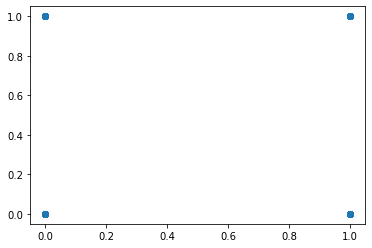

In [173]:
plt.scatter(Y_test, predictions)

In [174]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [175]:
#Training accuracy
acc = accuracy_score(Y_train, logreg.predict(X_train))
print("Training accuracy = ", acc)

Training accuracy =  0.89


In [176]:
#testing accuracy
acc = accuracy_score(Y_test, predictions)
print("Testing accuracy = ", acc)

Testing accuracy =  0.9266666666666666


In [68]:
#if diff is between 5 - 10 % then it is overfit

## Answer the following questions

### 1. A tumor detector shows a 99.5% accuracy. Can you evaluate and comment on the performance of the detector based on the accuracy?  (10 marks)

If a model has a 99.5% of accuracy this is a very good percentage and it means that the model is working extreamly well to classify tumors. But this cannot alone be the conclusion metric, if this is the training accuracy we will need to compare it to the testing accuracy to see if the model is over/under fit. If the percentage difference beteern the testing and training accuracy is between 5-10 % then we can say that the model is overfit, otherwise we can say that the model is well fit. If the trainig, testing and precision score is no adquate then we can say that the model is underfit.
We also need to check the precision and recall alongside the accuracy of the model. From checking the recall we can conclude on if the model is able to find all relavent points in the dataset.
From checking the precision we can conclude if the model is able to detect relevant data points with great precision.It will check the number of true positives and divide it by number of true positives + false positives. It will judge if the instances found in the recall are truely relavent to the model or not. And finally, the F1-score; it combines the recall and precision to get the average of these two metricsto tell us how good or bad the model is doing.
If the tumor model has a good recall, precision and F1-score besides the accuracy then the model is a very good classification model.

### 2. Is logistic regression a classification algorithm or regression? Justify. (10 marks)

Logistic regression is a statistical model that uses a logistic function to model a dependent variable, it is ultimately a classification algorithm (NOT regression) used to assign observations to a discrete set of classes. 
It is not like linear regression which is a regression algorithm in which we can predict the value for the given set of rules as input to the model but it will forecast continuous values like 0.03, +1.2, -0.9, etc. But for logistic regression the model is be able to predict the dependent variable as one of the two probable class which could be 0 or 1. Hence, it becomes more suitable to categorize it in one of the two classes neither identifying it as a probability value to predict a class.

### 3. Add all the non-numerical categories to the training set and remove the ones that do not contribute to the output. (20 marks)

In [196]:
#encode non-numerical data
ad_data['Ad Topic Line'] = pd.get_dummies(ad_data['Ad Topic Line'], drop_first=True)
ad_data['Country'] = pd.get_dummies(ad_data['Country'], drop_first=True)
ad_data['City'] = pd.get_dummies(ad_data['City'], drop_first=True)
ad_data['Timestamp'] = pd.get_dummies(ad_data['Timestamp'], drop_first=True)

In [197]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,0,0,1,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,0,0,1,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0


In [184]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [198]:
X = ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage', 'Male', 'Ad Topic Line', 'City','Country', 'Timestamp']]
Y = ad_data[['Clicked on Ad']]

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [122]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [123]:
predictions = logreg.predict(X_test)

In [124]:
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

In [125]:
Y_test

,Clicked on Ad
545,1
298,0
109,0
837,1
194,0
...,...
847,0
682,1
884,0
325,1


In [126]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [127]:
#Training accuracy
acc = accuracy_score(Y_train, logreg.predict(X_train))
print("Training accuracy = ", acc)

Training accuracy =  0.89


In [106]:
#testing accuracy
acc = accuracy_score(Y_test, predictions)
print("Testing accuracy = ", acc)

Testing accuracy =  0.9266666666666666


In [118]:
#check correlation
coeff_df = pd.DataFrame(logreg.coef_.transpose(), X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Daily Time Spent on Site,-0.051243
Age,0.236157
Area Income,-0.000010
Daily Internet Usage,-0.024683
Male,0.001077
Ad Topic Line,0.000000
City,0.000000
Country,0.000158
Timestamp,0.000000


In [130]:
ad_data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,0.016572,-0.038297,-0.018951,-0.008630,0.006010,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.000032,-0.032459,-0.021044,-0.049259,-0.039665,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.031175,0.022207,0.001322,-0.003798,0.031521,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,-0.031927,-0.006316,0.028012,-0.011970,0.005999,-0.786539
Ad Topic Line,0.016572,-0.000032,0.031175,-0.031927,1.000000,-0.001001,0.032865,-0.002656,-0.001001,0.031639
City,-0.038297,-0.032459,0.022207,-0.006316,-0.001001,1.000000,0.032865,-0.002656,-0.001001,0.031639
Male,-0.018951,-0.021044,0.001322,0.028012,0.032865,0.032865,1.000000,-0.008810,0.032865,-0.038027
Country,-0.008630,-0.049259,-0.003798,-0.011970,-0.002656,-0.002656,-0.008810,1.000000,-0.002656,0.011994
Timestamp,0.006010,-0.039665,0.031521,0.005999,-0.001001,-0.001001,0.032865,-0.002656,1.000000,-0.031639
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,0.031639,0.031639,-0.038027,0.011994,-0.031639,1.000000


<AxesSubplot:>

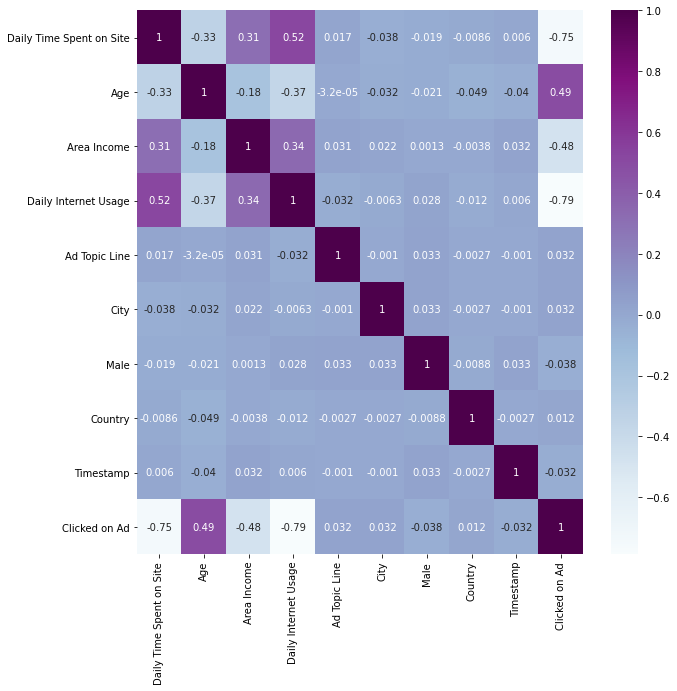

In [135]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(ad_data.corr(), cmap="BuPu", annot=True, ax=ax)

Run 1 - where we used only numerical fields to creat and run the model gave us a precision score of 0.91, recall of 0.92, f1 score of 0.93, a training accuracy of 0.89 and testing accuracy of 0.9267.
Run 2 - where we used all data fields, including non-numberical columns which were encoded to allow uagae in model. It gave us a precision score of 0.91, recall of 0.92, f1 score of 0.93, a training accuracy of 0.89 and testing accuracy of 0.9267.
Since both the runs have similar metric results, we will check the correlation between the feilds to get a more clear picture of how the non-numerical feilds affect the target feild.
While we look at the correlation between the feilds and the target coulmn:
If we look at the correlation of the non-numerical feilds and the target column: nearly all of them have the same correlation which is so close to zero which signified that it has no direct impact on the target column. Only the male column and the country column shows a positive effect of 0.001077 and 0.000158 respectively, while the other non-numerical have a correlation of 0. But the correlation of male and country also are very close to zero that it could be considered negligible, to have no real effect against the target column. Hence, we can decide to not include the non-numerical columns in the model creation and it will have no impact on the accuracy of the model